# 02. PyTorch Classification Exercises

The following is a template for 02. PyTorch Classification exercises.

It's only starter code and it's your job to fill in the blanks.

Because of the flexibility of PyTorch, there may be more than one way to answer the question.

Don't worry about trying to be *right* just try writing code that suffices the question.

## Resources
* These exercises are based on [notebook 02 of the learn PyTorch course](https://www.learnpytorch.io/02_pytorch_classification/).
* You can see one form of [solutions on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions) (but try the exercises below yourself first!).

In [275]:
# Import torch
import torch

# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

# Setup random seed
RANDOM_SEED = 42


## 1. Make a binary classification dataset with Scikit-Learn's [`make_moons()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) function.
  * For consistency, the dataset should have 1000 samples and a `random_state=42`.
  * Turn the data into PyTorch tensors. 
  * Split the data into training and test sets using `train_test_split` with 80% training and 20% testing.

In [276]:
# Create a dataset with Scikit-Learn's make_moons()
from sklearn.datasets import make_moons

moons = make_moons(1000, random_state=42)


In [277]:
# Turn data into a DataFrame
import pandas as pd

df = pd.DataFrame(*moons)
df

,0,1
1,0.008727,0.368174
1,0.921384,-0.496905
1,0.940226,-0.498212
1,0.465875,-0.345406
0,-0.850412,0.526117
...,...,...
0,0.785463,0.618909
0,-0.128705,0.991683
1,1.640910,-0.267616
0,-0.919916,0.392115


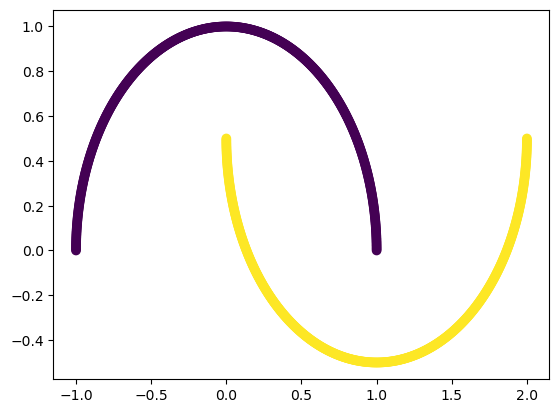

In [278]:
# Visualize the data on a scatter plot
import matplotlib.pyplot as plt

plt.scatter(moons[0][:, 0], moons[0][:, 1], c=moons[1])


In [279]:
# Turn data into tensors of dtype float
X = torch.from_numpy(moons[0]).type(torch.float)
y = torch.from_numpy(moons[1]).type(torch.float)

# Split the data into train and test sets (80% train, 20% test)
from sklearn.model_selection import train_test_split

X_moons_train, X_moons_test, y_moons_train, y_moons_test = train_test_split(
    X, y, test_size=0.2
)

len(X_moons_train), len(X_moons_test), len(y_moons_train), len(y_moons_test)

(800, 200, 800, 200)

## 2. Build a model by subclassing `nn.Module` that incorporates non-linear activation functions and is capable of fitting the data you created in 1.
  * Feel free to use any combination of PyTorch layers (linear and non-linear) you want.

In [280]:
import torch
from torch import nn


# Inherit from nn.Module to make a model capable of fitting the mooon data
class MoonModelV0(nn.Module):
    def __init__(self, in_features, out_features, hidden_features=8, hidden_layers=3):
        super().__init__()
        self.input_layer = nn.Linear(in_features, hidden_features)
        self.hidden_layers = nn.ModuleList(
            [nn.Linear(hidden_features, hidden_features) for _ in range(hidden_layers)]
        )
        self.relu = nn.ReLU()
        self.output_layer = nn.Linear(hidden_features, out_features)

    def forward(self, x):
        x = self.input_layer(x)
        for i, l in enumerate(self.hidden_layers):
            x = l(self.relu(x))
        return self.output_layer(x)


model_0 = MoonModelV0(2, 1).to(device)
model_0


MoonModelV0(
  (input_layer): Linear(in_features=2, out_features=8, bias=True)
  (hidden_layers): ModuleList(
    (0): Linear(in_features=8, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=8, bias=True)
  )
  (relu): ReLU()
  (output_layer): Linear(in_features=8, out_features=1, bias=True)
)

## 3. Setup a binary classification compatible loss function and optimizer to use when training the model built in 2.

In [281]:
# Setup loss function
loss_fn = torch.nn.BCEWithLogitsLoss()
# Setup optimizer to optimize model's parameters
optimizer = torch.optim.SGD(model_0.parameters(), lr=0.1)


## 4. Create a training and testing loop to fit the model you created in 2 to the data you created in 1.
  * Do a forward pass of the model to see what's coming out in the form of logits, prediction probabilities and labels.
  * To measure model accuray, you can create your own accuracy function or use the accuracy function in [TorchMetrics](https://torchmetrics.readthedocs.io/en/latest/).
  * Train the model for long enough for it to reach over 96% accuracy.
  * The training loop should output progress every 10 epochs of the model's training and test set loss and accuracy.

In [282]:
# What's coming out of our model?

# logits (raw outputs of model)
model_0.eval()
with torch.inference_mode():
    y_moons_logits = model_0(X_moons_test.to(device)).squeeze()

print(f"Logits: \n{y_moons_logits}")

# Prediction probabilities
y_moons_probs = torch.sigmoid(y_moons_logits)
print(f"Pred probs: \n{y_moons_probs[:5]}")


# Prediction labels
y_moons_labels = torch.round(y_moons_probs)
print(f"Pred labels: \n{y_moons_labels[:5]}")
## Your code here ##


Logits: 
tensor([-0.3563, -0.3561, -0.3562, -0.3562, -0.3565, -0.3565, -0.3554, -0.3565,
        -0.3557, -0.3551, -0.3634, -0.3564, -0.3557, -0.3565, -0.3565, -0.3565,
        -0.3567, -0.3540, -0.3539, -0.3562, -0.3564, -0.3644, -0.3565, -0.3565,
        -0.3645, -0.3565, -0.3565, -0.3565, -0.3565, -0.3562, -0.3563, -0.3565,
        -0.3565, -0.3558, -0.3565, -0.3565, -0.3561, -0.3556, -0.3564, -0.3592,
        -0.3565, -0.3549, -0.3565, -0.3565, -0.3631, -0.3556, -0.3556, -0.3565,
        -0.3565, -0.3565, -0.3565, -0.3565, -0.3565, -0.3563, -0.3603, -0.3555,
        -0.3565, -0.3565, -0.3565, -0.3565, -0.3565, -0.3565, -0.3560, -0.3565,
        -0.3556, -0.3562, -0.3565, -0.3565, -0.3565, -0.3565, -0.3565, -0.3565,
        -0.3561, -0.3565, -0.3565, -0.3565, -0.3565, -0.3556, -0.3544, -0.3565,
        -0.3549, -0.3565, -0.3554, -0.3562, -0.3565, -0.3565, -0.3565, -0.3565,
        -0.3565, -0.3561, -0.3554, -0.3560, -0.3562, -0.3605, -0.3565, -0.3565,
        -0.3565, -0.3553, -0.35

In [283]:
# Let's calculuate the accuracy using accuracy from TorchMetrics
from torchmetrics import Accuracy

## TODO: Uncomment this code to use the Accuracy function
acc_fn = Accuracy(task="multiclass", num_classes=2).to(
    device
)  # send accuracy function to device
acc_fn(y_moons_labels, y_moons_test.to(device))

tensor(0.4450, device='cuda:0')

In [284]:
## TODO: Uncomment this to set the seed
torch.manual_seed(RANDOM_SEED)

# Setup epochs
epochs = 1000

# Send data to the device
X_moons_train, X_moons_test = X_moons_train.to(device), X_moons_test.to(device)
y_moons_train, y_moons_test = y_moons_train.to(device), y_moons_test.to(device)

# Loop through the data
for epoch in range(epochs):
    ### Training
    model_0.train()

    # 1. Forward pass (logits output)
    y_moons_logits = model_0(X_moons_train).squeeze()

    # Turn logits into prediction probabilities
    y_moons_probs = torch.sigmoid(y_moons_logits)

    # Turn prediction probabilities into prediction labels
    y_moons_labels = torch.round(y_moons_probs)

    # 2. Calculaute the loss
    loss = loss_fn(
        y_moons_logits, y_moons_train
    )  # loss = compare model raw outputs to desired model outputs

    # Calculate the accuracy
    acc = acc_fn(
        y_moons_labels, y_moons_train
    )  # the accuracy function needs to compare pred labels (not logits) with actual labels

    # 3. Zero the gradients
    optimizer.zero_grad()

    # 4. Loss backward (perform backpropagation) - https://brilliant.org/wiki/backpropagation/#:~:text=Backpropagation%2C%20short%20for%20%22backward%20propagation,to%20the%20neural%20network's%20weights.
    loss.backward()

    # 5. Step the optimizer (gradient descent) - https://towardsdatascience.com/gradient-descent-algorithm-a-deep-dive-cf04e8115f21#:~:text=Gradient%20descent%20(GD)%20is%20an,e.g.%20in%20a%20linear%20regression)
    optimizer.step()

    ### Testing
    model_0.eval()
    with torch.inference_mode():
        # 1. Forward pass (to get the logits)
        y_moons_test_logits = model_0(X_moons_test).squeeze()

        # Turn the test logits into prediction labels
        y_moons_test_labels = torch.round(torch.sigmoid(y_moons_test_logits))

        # 2. Caculate the test loss/acc
        test_loss = loss_fn(y_moons_test_logits, y_moons_test)
        test_acc = acc_fn(y_moons_test_labels, y_moons_test)

    # Print out what's happening every 100 epochs
    if epoch % 100 == 0:
        print(
            f"Loss: {loss:2f} | Acc: {torch.round(acc * 100)}% | Test Loss {test_loss:2f} | Test Acc: {torch.round(test_acc * 100)}%"
        )


Loss: 0.703836 | Acc: 51.0% | Test Loss 0.726602 | Test Acc: 44.0%
Loss: 0.688656 | Acc: 51.0% | Test Loss 0.693570 | Test Acc: 44.0%
Loss: 0.596409 | Acc: 88.0% | Test Loss 0.615290 | Test Acc: 79.0%
Loss: 0.185926 | Acc: 93.0% | Test Loss 0.239184 | Test Acc: 91.0%
Loss: 0.037903 | Acc: 100.0% | Test Loss 0.047190 | Test Acc: 100.0%
Loss: 0.010692 | Acc: 100.0% | Test Loss 0.012674 | Test Acc: 100.0%
Loss: 0.005091 | Acc: 100.0% | Test Loss 0.005957 | Test Acc: 100.0%
Loss: 0.003084 | Acc: 100.0% | Test Loss 0.003610 | Test Acc: 100.0%
Loss: 0.002124 | Acc: 100.0% | Test Loss 0.002490 | Test Acc: 100.0%
Loss: 0.001582 | Acc: 100.0% | Test Loss 0.001853 | Test Acc: 100.0%


## 5. Make predictions with your trained model and plot them using the `plot_decision_boundary()` function created in this notebook.

In [285]:
# Plot the model predictions
from helper_functions import plot_decision_boundary

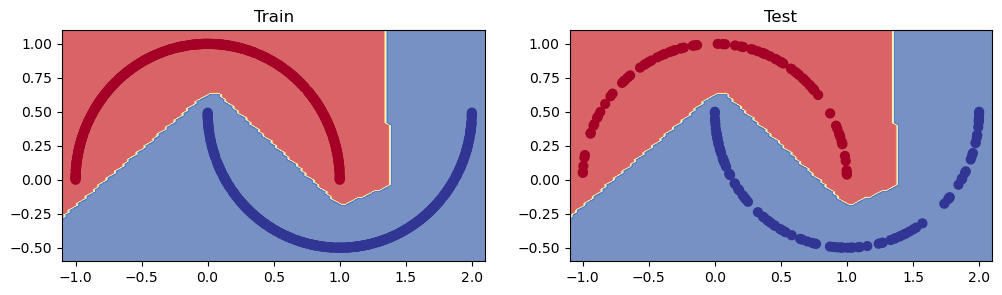

In [286]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_moons_train, y_moons_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_moons_test, y_moons_test)

## 6. Replicate the Tanh (hyperbolic tangent) activation function in pure PyTorch.
  * Feel free to reference the [ML cheatsheet website](https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html#tanh) for the formula.

In [287]:
# Create a straight line tensor
straight_line = torch.arange(-10, 10, 1)
straight_line


tensor([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,   3,
          4,   5,   6,   7,   8,   9])

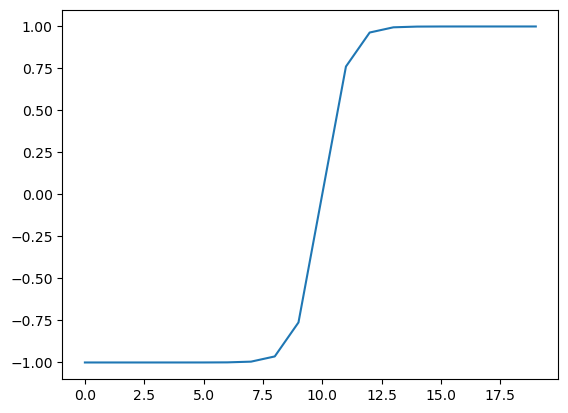

In [288]:
# Test torch.tanh() on the tensor and plot it
plt.plot(torch.tanh(straight_line))


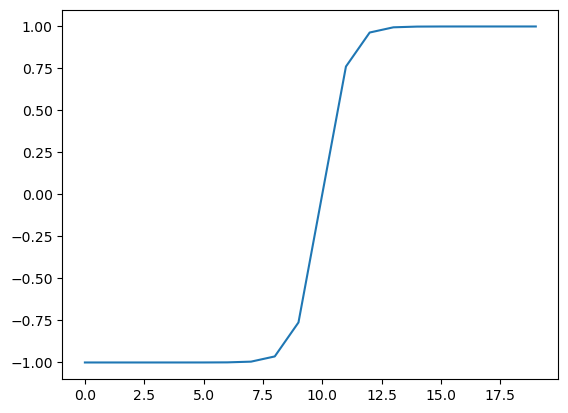

In [289]:
# Replicate torch.tanh() and plot it
def tanh(x):
    return (torch.exp(x) - torch.exp(-x)) / (torch.exp(x) + torch.exp(-x))


plt.plot(tanh(straight_line))

## 7. Create a multi-class dataset using the [spirals data creation function from CS231n](https://cs231n.github.io/neural-networks-case-study/) (see below for the code).
  * Split the data into training and test sets (80% train, 20% test) as well as turn it into PyTorch tensors.
  * Construct a model capable of fitting the data (you may need a combination of linear and non-linear layers).
  * Build a loss function and optimizer capable of handling multi-class data (optional extension: use the Adam optimizer instead of SGD, you may have to experiment with different values of the learning rate to get it working).
  * Make a training and testing loop for the multi-class data and train a model on it to reach over 95% testing accuracy (you can use any accuracy measuring function here that you like) - 1000 epochs should be plenty.
  * Plot the decision boundaries on the spirals dataset from your model predictions, the `plot_decision_boundary()` function should work for this dataset too.

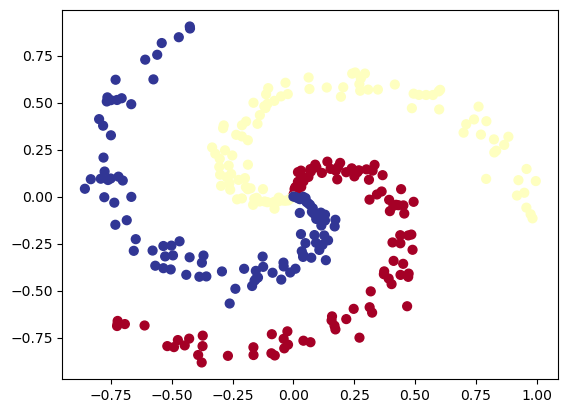

In [290]:
# Code for creating a spiral dataset from CS231n
import numpy as np
import matplotlib.pyplot as plt

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
N = 100  # number of points per class
D = 2  # dimensionality
K = 3  # number of classes
X = np.zeros((N * K, D))  # data matrix (each row = single example)
y = np.zeros(N * K, dtype="uint8")  # class labels
for j in range(K):
    ix = range(N * j, N * (j + 1))
    r = np.linspace(0.0, 1, N)  # radius
    t = np.linspace(j * 4, (j + 1) * 4, N) + np.random.randn(N) * 0.2  # theta
    X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
    y[ix] = j
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
plt.show()

In [291]:
# Turn data into tensors
import torch

X = torch.from_numpy(X).type(torch.float)  # features as float32
y = torch.from_numpy(y).type(torch.LongTensor)  # labels need to be of type long

# Create train and test splits
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train[:5], y_train[:5], X_test[:5], y_test[:5]

(tensor([[-0.0603, -0.0056],
         [-0.3050,  0.1578],
         [ 0.4073, -0.2439],
         [-0.1514, -0.0070],
         [-0.4407, -0.4161]]),
 tensor([1, 1, 0, 1, 2]),
 tensor([[ 0.0269, -0.0139],
         [-0.1544, -0.4382],
         [ 0.1568, -0.6584],
         [ 0.0534, -0.0286],
         [-0.7323, -0.1499]]),
 tensor([2, 2, 0, 2, 2]))

In [292]:
# Let's calculuate the accuracy for when we fit our model
from torchmetrics import Accuracy


acc_fn = Accuracy(task="multiclass", num_classes=4).to(device)
acc_fn


MulticlassAccuracy()

In [350]:
# Prepare device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"


# Create model by subclassing nn.Module
class SpiralModelV1(nn.Module):
    def __init__(
        self, in_features: int, out_features: int, hidden_features=8, hidden_layers=3
    ):
        super().__init__()
        self.input_layer = nn.Linear(in_features, hidden_features)
        self.linear_layers = nn.ModuleList(
            [nn.Linear(hidden_features, hidden_features) for i in range(hidden_layers)]
        )
        self.output_layer = nn.Linear(hidden_features, out_features)

    def forward(self, x):
        x = self.input_layer(x)
        for i, l in enumerate(self.linear_layers):
            x = l(nn.functional.relu(x))
        return self.output_layer(x)


# Instantiate model and send it to device
model_1 = SpiralModelV1(2, 3, 128, 3).to(device)
model_1


SpiralModelV1(
  (input_layer): Linear(in_features=2, out_features=128, bias=True)
  (linear_layers): ModuleList(
    (0): Linear(in_features=128, out_features=128, bias=True)
    (1): Linear(in_features=128, out_features=128, bias=True)
    (2): Linear(in_features=128, out_features=128, bias=True)
  )
  (output_layer): Linear(in_features=128, out_features=3, bias=True)
)

In [351]:
# Setup data to be device agnostic
X_train, X_test = X_train.to(device), X_test.to(device)
y_train, y_test = y_train.to(device), y_test.to(device)

# Print out first 10 untrained model outputs (forward pass)
print("Logits:")

model_1.eval()
with torch.inference_mode():
    y_logits = model_1(X_test)

print(y_logits[:10])

print("Pred probs:")
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_pred_probs[:10])

print("Pred labels:")
y_pred_labels = torch.argmax(y_pred_probs, dim=1)
print(y_pred_labels)

Logits:
tensor([[0.0359, 0.0237, 0.0748],
        [0.0297, 0.0115, 0.0857],
        [0.0366, 0.0104, 0.0878],
        [0.0355, 0.0237, 0.0746],
        [0.0246, 0.0137, 0.0812],
        [0.0341, 0.0226, 0.0765],
        [0.0281, 0.0055, 0.0907],
        [0.0262, 0.0055, 0.0901],
        [0.0347, 0.0295, 0.0694],
        [0.0354, 0.0319, 0.0697]], device='cuda:0')
Pred probs:
tensor([[0.3303, 0.3263, 0.3434],
        [0.3290, 0.3231, 0.3480],
        [0.3304, 0.3219, 0.3477],
        [0.3302, 0.3264, 0.3434],
        [0.3282, 0.3246, 0.3473],
        [0.3298, 0.3260, 0.3441],
        [0.3287, 0.3214, 0.3499],
        [0.3284, 0.3216, 0.3500],
        [0.3300, 0.3283, 0.3417],
        [0.3299, 0.3287, 0.3414]], device='cuda:0')
Pred labels:
tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], device='cuda:0')


In [352]:
# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.1)

In [353]:
# Build a training loop for the model
epochs = 2000

# Loop over data
for epoch in range(epochs):

    model_1.train()
    y_logits = model_1(X_train)
    y_pred_probs = torch.softmax(y_logits, dim=1)
    y_pred_labels = torch.argmax(y_pred_probs, dim=1)

    loss = loss_fn(y_logits, y_train)
    acc = acc_fn(y_pred_labels, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    ## Testing

    model_1.eval()

    y_test_logits = model_1(X_test)
    y_test_pred_probs = torch.softmax(y_test_logits, dim=1)
    y_test_pred_labels = torch.argmax(y_test_pred_probs, dim=1)

    test_acc = acc_fn(y_test_pred_labels, y_test)

    # Print out what's happening every 100 epochs
    if epoch % 100 == 0:
        print(
            f"Loss: {loss} Acc: {acc} | Test Loss: {test_loss} | Test Acc: {test_acc}"
        )

Loss: 1.0969902276992798 Acc: 0.30416667461395264 | Test Loss: 0.0014565658057108521 | Test Acc: 0.44999998807907104
Loss: 0.6796017289161682 Acc: 0.574999988079071 | Test Loss: 0.0014565658057108521 | Test Acc: 0.550000011920929
Loss: 0.5614949464797974 Acc: 0.737500011920929 | Test Loss: 0.0014565658057108521 | Test Acc: 0.75
Loss: 0.2998034656047821 Acc: 0.8833333253860474 | Test Loss: 0.0014565658057108521 | Test Acc: 0.8333333134651184
Loss: 0.10472247749567032 Acc: 0.9583333134651184 | Test Loss: 0.0014565658057108521 | Test Acc: 0.9166666865348816
Loss: 0.06198287382721901 Acc: 0.9833333492279053 | Test Loss: 0.0014565658057108521 | Test Acc: 0.9833333492279053
Loss: 0.04659619554877281 Acc: 0.987500011920929 | Test Loss: 0.0014565658057108521 | Test Acc: 0.9666666388511658
Loss: 0.04159234091639519 Acc: 0.987500011920929 | Test Loss: 0.0014565658057108521 | Test Acc: 0.9666666388511658
Loss: 0.03745829686522484 Acc: 0.987500011920929 | Test Loss: 0.0014565658057108521 | Test Ac

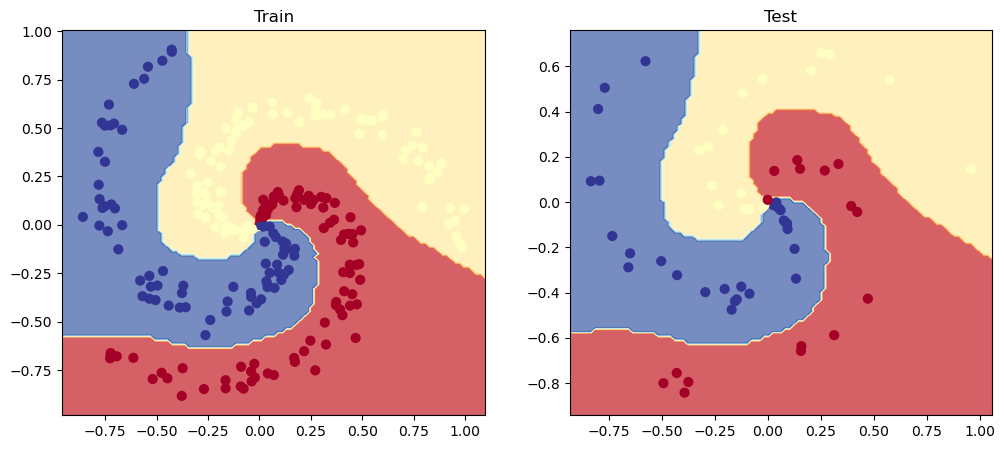

In [354]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)